### Importing dependencies

In [1]:
#Ignore warning
import warnings
warnings.filterwarnings('ignore')

# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Data Collection and Analysis

In [2]:
# Location path
location=r'C:\Users\DELL\Mall_Customers.csv'

# Reading the dataframe
df=pd.read_csv(location)

In [3]:
# Checking the first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Finding the number of rows and columns
df.shape

(200, 5)

In [5]:
# Checking the basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Checking the missing values in the dataset
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
### Choosing the Annual Income & spending score column only for this problem --> To get the values in the numpy array format
X=df.iloc[:,[3,4]].values

In [8]:
# Checking the numpy array obtained
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Choosing the correct number of clusters
#### WCSS = Within Cluster Sum of Squares

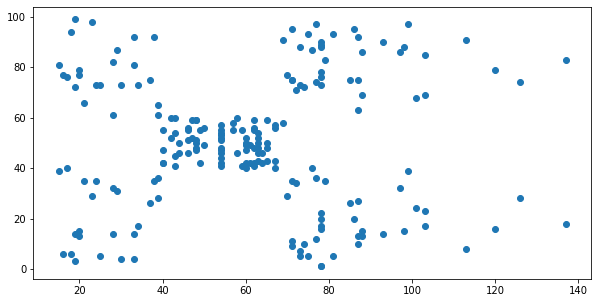

In [9]:
# Before going for deciding the good number of clusters with elbow method , I decided to plot the inputs
# It appears through visualzation that 5 clusters should give least WCSS 

plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1])
plt.show()

In [10]:
# Finding WCSS for different number of clusters

wcss=[]

for cluster_number in range(1,11):
  kmeans=KMeans(n_clusters=cluster_number,
                init='k-means++',
                random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

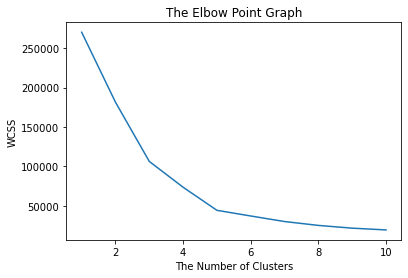

In [11]:
# Plotting an elbow graph / Cut off point graph --> This graph aligns with the previous assumption from the visualisation
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('The Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Optimum number of clusters = 5 

### Training the k-means clustering algorithm

In [12]:
# Initializing the kmeans object
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)

In [13]:
# Returing a label for each datapoint based upon thier cluster number
Y=kmeans.fit_predict(X)
print(Y)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


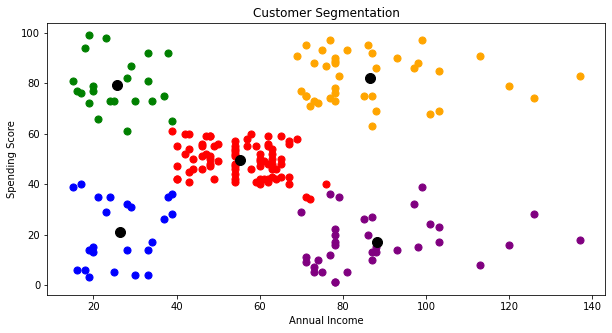

In [14]:
#### Visualizing the clusters
# By plotting the centroids & the clusters

plt.figure(figsize=(10,5))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster-1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster-2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='orange',label='Cluster-3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='blue',label='Cluster-4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='purple',label='Cluster-5')

# Plotting the cluster centroids

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')

plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.show()